In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline


Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#                   WEIGHT CORRECTION WRT TO PU
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Initialize the quantile regression object for mc

qr_mc_ConWeights= quantileRegression("mc")

qr_mc_ConWeights2= quantileRegression("mc")

print "Load the mc dataframe"
startEvt = 0
stopEvt   = 2000000
print "Load the mc dataframe"
qr_mc_ConWeights.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)
qr_mc_ConWeights2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)

Load the mc dataframe
Load the mc dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [5]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvt = 0
stopEvt   = 2000000
print "Load the data dataframe"
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5", startEvt, stopEvt)
dfdata = qr_data.getDF()

Load the data dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


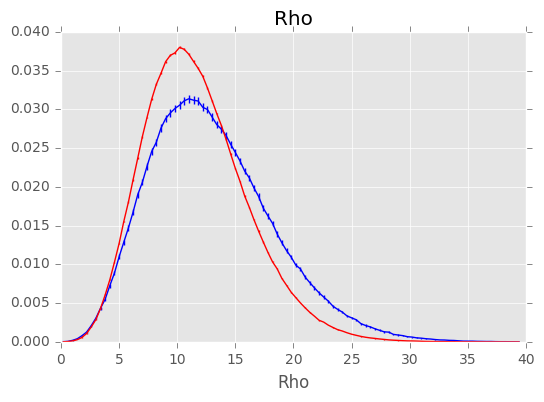

In [6]:
#histogramming wrt rho
rv=np.arange(0,40,0.4)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
#plot histograms
plot.plotHistErr(qr_mc_ConWeights.df.loc[:,"rho"], rv, qr_mc_ConWeights.df["weight"],"b")
plot.plotHistErr(qr_data.df.loc[:,"rho"], rv)
ax.set_title("Rho")
#get histogram info
data_bins,data_edges,data_err=plot.getHistErr(qr_data.df.loc[:,"rho"], rv)
mc_bins,mc_edges,mc_err=plot.getHistErr(qr_mc_ConWeights.df.loc[:,"rho"], rv, qr_mc_ConWeights.df["weight"])

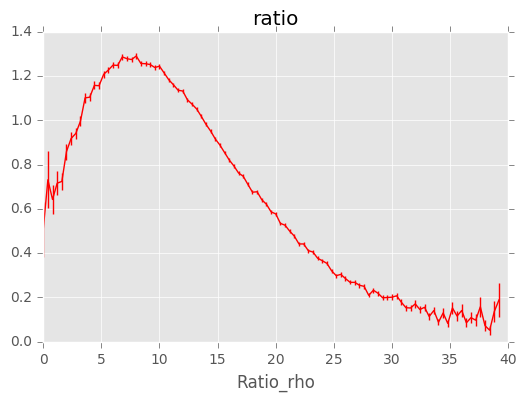

In [10]:
#Take the ratio

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

plot.plotHistRatio(qr_data.df.loc[:,"rho"],qr_mc_ConWeights.df.loc[:,"rho"], rv,Weight2=qr_mc_ConWeights.df["weight"],Color="r")
h1, rv,errh1= plot.getHistRatio(qr_data.df.loc[:,"rho"],qr_mc_ConWeights.df.loc[:,"rho"], rv,Weight2=qr_mc_ConWeights.df["weight"],Color="r")
ax.set_title('ratio')

In [11]:
#find the correction for each weight:
import pandas as pd
#find corrected value of correction:
qr_mc_ConWeights.df['bin'] = np.digitize(qr_mc_ConWeights.df['rho'],mc_edges)

#compute correction vector--> why the minus 1?
qr_mc_ConWeights.df["corr"]= h1[qr_mc_ConWeights.df['bin'].values-1]

#correct the weights: not sure about this.....
qr_mc_ConWeights.df["corrweight"]=qr_mc_ConWeights.df["weight"].values/qr_mc_ConWeights.df["puweight"].values*qr_mc_ConWeights.df["corr"].values

In [ ]:
#I have found the corrected weights (maybe?), now I need to do train a new BDT wrt these new weights, right?
#so I need to print this new dataframe to a file in order to train it?

#TODO: weighted error in the histograms?